In [29]:
#We import the same libraries as the examples

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge folium=0.5.0 --yes
#!pip install geopandas
#!pip install descartes
import folium # plotting library
from pandas.io.json import json_normalize

import requests # library to handle requests


In [30]:
#We retrieve the Lima's district data
!wget -q -O 'zones_data.json' https://raw.githubusercontent.com/mmarroquinavatar/Coursera_Capstone/master/nuevo_mapa.json

In [31]:
with open('zones_data.json') as json_data:
    zones_data = json.load(json_data)

In [32]:
neighborhoods_data = zones_data['features']

In [33]:
#Verifying is geojson data
neighborhoods_data[0]

{'type': 'Feature',
 'properties': {'stroke': '#555555',
  'stroke-width': 2,
  'stroke-opacity': 1,
  'fill': '#555555',
  'fill-opacity': 0.5,
  'DISTRITO': 'San Miguel',
  'SUBDISTRITO': 'San Miguel Costanera'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-77.08443403244019, -12.088212792096702],
    [-77.09702968597412, -12.082463696038444],
    [-77.10342407226562, -12.07956811914402],
    [-77.10934638977051, -12.076315803406747],
    [-77.10988283157349, -12.077406907283168],
    [-77.11048364639282, -12.07728101090892],
    [-77.11164236068726, -12.07963106680085],
    [-77.11106300354004, -12.079903839809381],
    [-77.11078405380249, -12.080092682498634],
    [-77.11061239242554, -12.08038643752827],
    [-77.11029052734375, -12.080554297400477],
    [-77.10655689239502, -12.082316819703694],
    [-77.10647106170654, -12.0826105722926],
    [-77.10481882095337, -12.08420522357817],
    [-77.10331678390503, -12.085086474159606],
    [-77.10192203521729, -12.0854641520

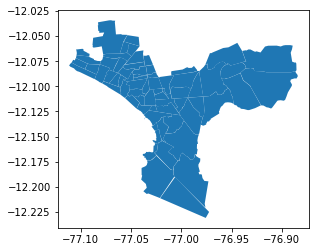

In [34]:
#We need to import to a geopanda because we need to determine the centroid of the districts

import geopandas as gpd
gdf = gpd.read_file('zones_data.json')
gdf.plot()


In [35]:
#We add centroid data to the panda
gdf["x"] = gdf.centroid.map(lambda p: p.x)
gdf["y"] = gdf.centroid.map(lambda p: p.y)
gdf = gdf.set_index("SUBDISTRITO",drop=False)
gdf.head()

stroke  stroke-width  stroke-opacity  \
SUBDISTRITO                                                                  
San Miguel Costanera                 #555555             2               1   
San Miguel Sur                       #555555             2               1   
San Miguel Comercial                 #555555             2               1   
San Miguel Centro                    #555555             2               1   
La Planicie -  El Sol de  la Molina  #555555             2               1   

                                        fill  fill-opacity    DISTRITO  \
SUBDISTRITO                                                              
San Miguel Costanera                 #555555           0.5  San Miguel   
San Miguel Sur                       #555555           0.5  San Miguel   
San Miguel Comercial                 #555555           0.5  San Miguel   
San Miguel Centro                    #555555           0.5  San Miguel   
La Planicie -  El Sol de  la Molina  #555555           0.5   La Molina   

                                                             SUBDISTRITO  \
SUBDISTRITO                                                                
San Miguel Costanera                                San Miguel Costanera   
San Miguel Sur                                            San Miguel Sur   
San Miguel Comercial                                San Miguel Comercial   
San Miguel Centro                                      San Miguel Centro   
La Planicie -  El Sol de  la Molina  La Planicie -  El Sol de  la Molina   

                                                                              geometry  \
SUBDISTRITO                                                                              
San Miguel Costanera                 POLYGON ((-77.08443403244019 -12.0882127920967...   
San Miguel Sur                       POLYGON ((-77.10917472839355 -12.0763787518281...   
San Miguel Comercial                 POLYGON ((-77.10488319396973 -12.0719933097494...   
San Miguel Centro                    POLYGON ((-77.09338188171387 -12.0775328035982...   
La Planicie -  El Sol de  la Molina  POLYGON ((-76.88618659973145 -12.0762528549705...   

                                             x          y  
SUBDISTRITO                                                
San Miguel Costanera                -77.097651 -12.084719  
San Miguel Sur                      -77.100989 -12.077315  
San Miguel Comercial                -77.092920 -12.073853  
San Miguel Centro                   -77.088092 -12.082060  
La Planicie -  El Sol de  la Molina -76.910955 -12.073498

In [36]:
#We open the land price data and sort by land price descending
with open('preciopordistrito.json') as json_data2:
    price_temp = json.load(json_data2)
    
price_data = json_normalize(price_temp['data'])

price_data["ventaprecio2"]=price_data["ventaprecio2"].str.strip()
price_data["ventaprecio2"]=price_data["ventaprecio2"].str.replace(',','')

price_data["ventaprecio2"]=pd.to_numeric(price_data["ventaprecio2"])

price_data= price_data.sort_values(by=['ventaprecio2'],ascending=False)

price_data = price_data.set_index("name", drop = False)

#We get the most expensive zone
most_expensive_zone  = price_data.iloc[0].name
second_most_expensive_zone  = price_data.iloc[1].name

price_data.head(3)


cartodb_id               name   provincia  ventaprecio2
name                                                                      
San Isidro Sur             76     San Isidro Sur  San Isidro          3141
Barranco Cultural          74  Barranco Cultural    Barranco          2831
Nuevo Barranco             12     Nuevo Barranco    Barranco          2784

In [37]:
#The first most expensive zone coordinates
coords = gdf.loc[most_expensive_zone]

latitude = coords.y
longitude = coords.x
print(latitude, longitude)



-12.106520601971685 -77.04504315724839


In [38]:
#We display the initial map centered in the most expensive zone

state_geo = os.path.join('', 'zones_data.json')

m = folium.Map(location=[latitude, longitude], zoom_start=12)

m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=price_data,
    columns=['name', 'ventaprecio2'],
    key_on='properties.SUBDISTRITO',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Cost(USD$ per square meter)'
)


m

In [39]:
#Using the most expensive zone coordinates we scan the sorrounding for others hotels

CLIENT_ID = 'GTUX0ONZMRA40B34UZV3BXCRLJJFO0LEZ2N2ZWG5OORR3JYR' # your Foursquare ID
CLIENT_SECRET = 'C3I4BDDN2M4X5PJQFXUI35T4TVILOO2RWMMTOIOEDHRJBHKQ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
   
search_query = 'Hotel'
radius = 4000
print(search_query + ' .... OK!')

#### Define the corresponding URL

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

#### Send the GET Request and examine the results

results = requests.get(url).json()
#results


Your credentails:
CLIENT_ID: GTUX0ONZMRA40B34UZV3BXCRLJJFO0LEZ2N2ZWG5OORR3JYR
CLIENT_SECRET:C3I4BDDN2M4X5PJQFXUI35T4TVILOO2RWMMTOIOEDHRJBHKQ
Hotel .... OK!


In [40]:
#The map venues are processed liked in the tutorials

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

#### Define information of interest and filter dataframe

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered = dataframe_filtered.sort_values("distance")

#### Let's visualize the hotels restaurants that are nearby

dataframe_filtered.head(5)

name categories  \
7   Roosevelt Hotel & Suites      Hotel   
6           Royal Park Hotel      Hotel   
11        Foresta Hotel Lima      Hotel   
1              NM Lima Hotel      Hotel   
0    Delfines Hotel & Casino      Hotel   

                                   address  cc        city country  \
7                 Av. Alvarez Calderón 194  PE  San Isidro    Perú   
6                     Av. Camino Real 1050  PE  San Isidro    Perú   
11  Calle Los Libertadores 490, San Isidro  PE        Lima    Perú   
1                   Av. Pardo y Aliaga 300  PE  San Isidro    Perú   
0                   Ca. Los Eucaliptos 555  PE  San Isidro    Perú   

                  crossStreet  distance  \
7           esq. Miguel Dasso       552   
6                         NaN       712   
11  Esq. Conde de la Monclova       907   
1                         NaN       994   
0                         NaN      1019   

                                     formattedAddress  \
7   [Av. Alvarez Calderón 194 (esq. Miguel Dasso),...   
6        [Av. Camino Real 1050, San Isidro, 27, Perú]   
11  [Calle Los Libertadores 490, San Isidro (Esq. ...   
1      [Av. Pardo y Aliaga 300, San Isidro, 27, Perú]   
0      [Ca. Los Eucaliptos 555, San Isidro, 27, Perú]   

                                       labeledLatLngs        lat        lng  \
7   [{'label': 'display', 'lat': -12.1055068374352... -12.105507 -77.040073   
6   [{'label': 'display', 'lat': -12.1042258646369... -12.104226 -77.038934   
11  [{'label': 'display', 'lat': -12.1028016915024... -12.102802 -77.037622   
1   [{'label': 'display', 'lat': -12.1073212221942... -12.107321 -77.035941   
0   [{'label': 'display', 'lat': -12.0977912981544... -12.097791 -77.047887   

   postalCode state                        id  
7          27  Lima  4bc78a3f93bdeee1d87e37ae  
6          27  Lima  4d88a770d85f370431c1d5db  
11         27  Lima  4bdf10ce7ea362b5214d43c4  
1          27  Lima  4bc78a3e93bdeee1d67e37ae  
0          27  Lima  4bd1a45f5e0cce7260c4a184

In [41]:
#The API don't allow to retrieve the ratings
#import time
#venue_ids = []
#frames = []
#for d in dataframe_filtered["id"]:                
#                requested_keys2 = ["id", "price.currency","rating", "likes.count"]#

#                url2 = "https://api.foursquare.com/v2/venues/%s?client_id=%s&client_secret=%s&v=%s" % (d, CLIENT_ID, CLIENT_SECRET, time.strftime("%Y%m%d"))
#                #req2 = urllib2.Request(url2)
#                #response2 = urllib2.urlopen(req2)
#                data2 = requests.get(url2).json() #json.loads(response2.read())
#                print(data2)
#                #response.close()
#                ddata = data2['response']               
#                print(ddata)
#
#                nom_data = json_normalize(ddata['venue'])

#                if "price.currency" not in nom_data.columns:
#                    nom_data["price.currency"] = 'NONE'

#                if "rating" not in nom_data.columns:
#                    nom_data["rating"] = 'NONE'                 

#                venue_ids.append(d)
#                frames.append(nom_data[requested_keys2])
#                #print "getting attr for %s" % nom_data["name"]
#                time.sleep(1)
                
#df2 = pd.concat(frames, keys=venue_ids)

#mdata = pd.merge(data, df2,how='left',on='id', suffixes=('_x', '_y'))
#mdata
#venue_ids

In [42]:
#venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the center of our map
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(m)

# add the hotels as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

# display map
m

In [43]:
X=dataframe_filtered.loc[:,['lat','lng']]
X


lat        lng
7  -12.105507 -77.040073
6  -12.104226 -77.038934
11 -12.102802 -77.037622
1  -12.107321 -77.035941
0  -12.097791 -77.047887
12 -12.097805 -77.047995
5  -12.097843 -77.048798
4  -12.097911 -77.035136
10 -12.119528 -77.042248
2  -12.094963 -77.038001
15 -12.096986 -77.033793
3  -12.119335 -77.037836
16 -12.094859 -77.035727
24 -12.097126 -77.033248
18 -12.119280 -77.036680
13 -12.092005 -77.038841
28 -12.118267 -77.032654
9  -12.118609 -77.032452
20 -12.115949 -77.029457
22 -12.121675 -77.035009
17 -12.118062 -77.027376
14 -12.125383 -77.032918
21 -12.125090 -77.031397
26 -12.124532 -77.030199
8  -12.091532 -77.024936
25 -12.126330 -77.028925
23 -12.126995 -77.029282
29 -12.121768 -77.023121
27 -12.131562 -77.029228
19 -12.097222 -77.011460

In [44]:
#Let's cluster the hotels

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
#run KMeans
id_n=7
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
id_label=kmeans.labels_


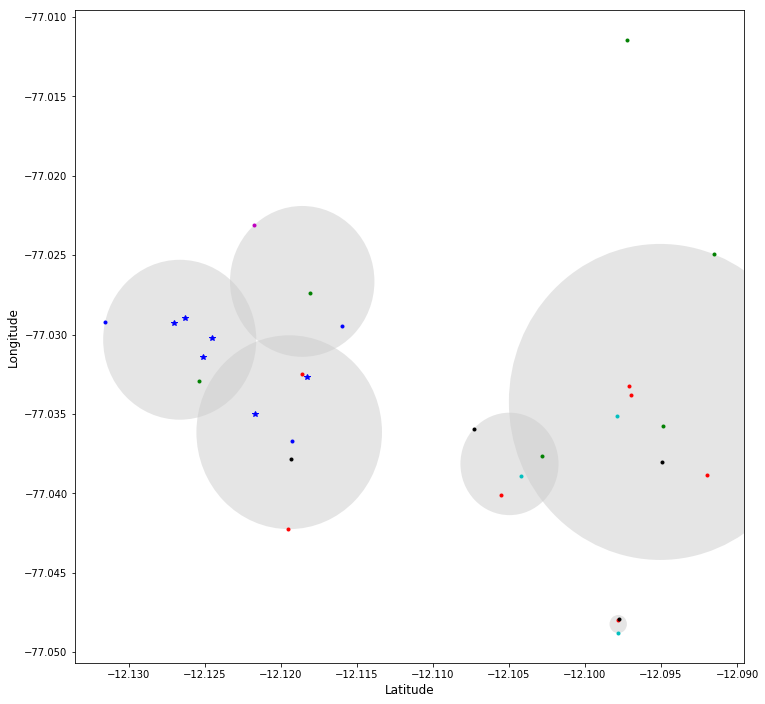

In [45]:
import matplotlib.pyplot as plt

#plot result
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
fig= plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(X.lat[cluster].values,X.lng[cluster].values,ptsymb[i])
    
centers = kmeans.cluster_centers_
radii = [cdist(X[id_label == i], [center]).max()
                for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        folium.features.Circle(
         c,
         radius=r*111111,
         color='red',
         fill = True,
         fill_color = 'red',
         fill_opacity = 0.3
        ).add_to(m)
plt.show()


In [46]:
#We are far enough of the clusters. This is a good place to build the hotel.
m

In [47]:
#We analize our second option, Barranco

In [48]:
#The first most expensive zone coordinates
coords = gdf.loc[second_most_expensive_zone]

latitude = coords.y
longitude = coords.x
print(latitude, longitude)



-12.150655851944808 -77.02343077765507


In [49]:
#We display the initial map centered in the most expensive zone

state_geo = os.path.join('', 'zones_data.json')

m2 = folium.Map(location=[latitude, longitude], zoom_start=12)

m2.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=price_data,
    columns=['name', 'ventaprecio2'],
    key_on='properties.SUBDISTRITO',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Cost(USD$ per square meter)'
)


m2

In [50]:
#Using the most expensive zone coordinates we scan the sorrounding for others hotels

CLIENT_ID = 'GTUX0ONZMRA40B34UZV3BXCRLJJFO0LEZ2N2ZWG5OORR3JYR' # your Foursquare ID
CLIENT_SECRET = 'C3I4BDDN2M4X5PJQFXUI35T4TVILOO2RWMMTOIOEDHRJBHKQ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
   
search_query = 'Hotel'
radius = 4000
print(search_query + ' .... OK!')

#### Define the corresponding URL

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

#### Send the GET Request and examine the results

results = requests.get(url).json()
#results


Your credentails:
CLIENT_ID: GTUX0ONZMRA40B34UZV3BXCRLJJFO0LEZ2N2ZWG5OORR3JYR
CLIENT_SECRET:C3I4BDDN2M4X5PJQFXUI35T4TVILOO2RWMMTOIOEDHRJBHKQ
Hotel .... OK!


In [51]:
#The map venues are processed liked in the tutorials

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

#### Define information of interest and filter dataframe

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered = dataframe_filtered.sort_values("distance")

#### Let's visualize the hotels restaurants that are nearby

dataframe_filtered.head(5)

name categories                               address  \
24            Hotel Meliana       None  Av Manuel Ugarteche 309 selva alegre   
0                   Hotel B      Hotel                    Av. Sáenz Peña 204   
3                   Hotel B      Hotel                        Av. San Martin   
16            Hotel Nirvana      Hotel        Av. Paseo De La República 6315   
6   JW Marriott - Hotel Bar  Hotel Bar                            Ave. Larco   

    cc        city country        crossStreet  distance  \
24  PE    Arequipa    Perú            Cercado       195   
0   PE    Barranco    Perú         San Martín       857   
3   PE        Lima    Perú                NaN       859   
16  PE  Miraflores    Perú                NaN      2110   
6   PE  Miraflores    Perú  Mco de la Reserva      2212   

                                     formattedAddress  \
24  [Av Manuel Ugarteche 309 selva alegre (Cercado...   
0   [Av. Sáenz Peña 204 (San Martín), Barranco, Ba...   
3                        [Av. San Martin, Lima, Perú]   
16  [Av. Paseo De La República 6315, Miraflores, P...   
6   [Ave. Larco (Mco de la Reserva), Miraflores, P...   

                                       labeledLatLngs        lat        lng  \
24  [{'label': 'display', 'lat': -12.149236, 'lng'... -12.149236 -77.022376   
0   [{'label': 'display', 'lat': -12.1429543860206... -12.142954 -77.023266   
3   [{'label': 'display', 'lat': -12.1443374363514... -12.144337 -77.018891   
16  [{'label': 'display', 'lat': -12.1317781225687... -12.131778 -77.021658   
6   [{'label': 'display', 'lat': -12.1316761578210... -12.131676 -77.029451   

   neighborhood postalCode     state                        id  
24          NaN   Arequipa  Arequipa  4c90f1261adc3704a0c82bd1  
0      Barranco      15063      Lima  51ba73b7498e3fb87238bf18  
3           NaN        NaN      Lima  51f70e9b498e092670961639  
16          NaN        NaN      Lima  4d995f82e07ea35d1ecd0703  
6           NaN       Peru      Lima  4b88bc83f964a520410b32e3

In [52]:
#venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the center of our map
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(m2)

# add the hotels as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m2)

# display map
m2

In [53]:
X=dataframe_filtered.loc[:,['lat','lng']]
X


lat        lng
24 -12.149236 -77.022376
0  -12.142954 -77.023266
3  -12.144337 -77.018891
16 -12.131778 -77.021658
6  -12.131676 -77.029451
1  -12.131562 -77.029228
14 -12.130876 -77.029193
11 -12.129119 -77.031747
20 -12.128979 -77.032370
5  -12.126995 -77.029282
7  -12.126330 -77.028925
26 -12.125037 -77.022268
27 -12.124572 -77.027859
8  -12.125090 -77.031397
2  -12.125383 -77.032918
28 -12.124079 -77.027933
12 -12.124532 -77.030199
19 -12.123755 -77.026879
21 -12.122695 -77.027830
13 -12.121768 -77.023121
18 -12.128300 -77.004458
25 -12.120973 -77.031915
17 -12.121675 -77.035009
10 -12.118062 -77.027376
9  -12.118609 -77.032452
29 -12.118267 -77.032654
23 -12.119280 -77.036680
4  -12.119335 -77.037836
22 -12.115949 -77.029457
15 -12.119528 -77.042248

In [54]:
#Let's cluster the hotels

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
#run KMeans
id_n=7
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
id_label=kmeans.labels_


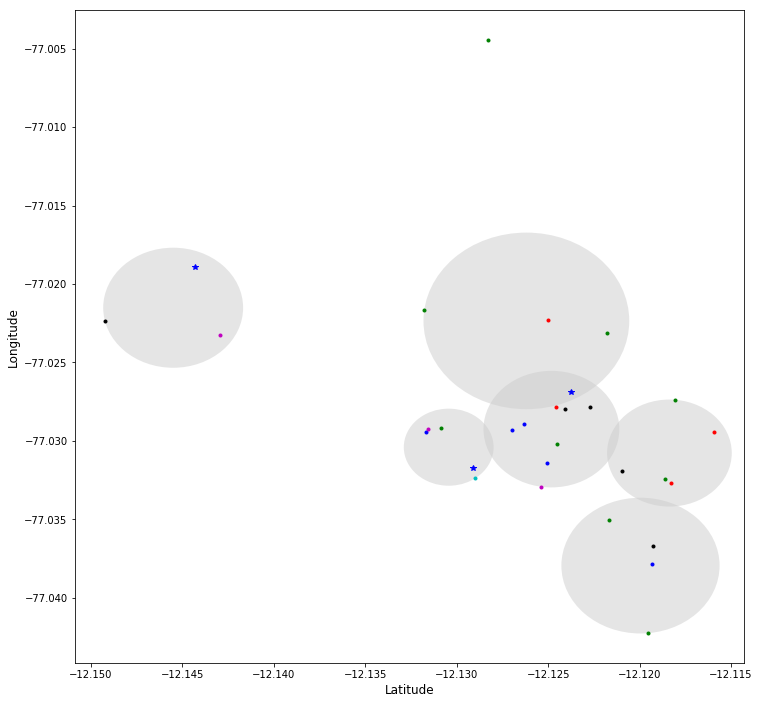

In [55]:
import matplotlib.pyplot as plt

#plot result
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
fig= plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(X.lat[cluster].values,X.lng[cluster].values,ptsymb[i])
    
centers = kmeans.cluster_centers_
radii = [cdist(X[id_label == i], [center]).max()
                for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        folium.features.Circle(
         c,
         radius=r*111111,
         color='red',
         fill = True,
         fill_color = 'red',
         fill_opacity = 0.3
        ).add_to(m2)
plt.show()

In [56]:
m2